In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [7]:
image_path = '../output_videos/cropped_player_3.jpg'
image = cv2.imread(image_path)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

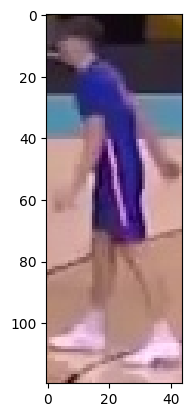

In [8]:
plt.imshow(img)
plt.show()

# Just take the Top half of the image where the jersy is


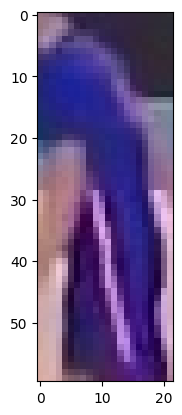

In [20]:
top_half_image = img[int(img.shape[0]*0.10):int(img.shape[0]*0.60), int(img.shape[1]*0.25):int(img.shape[1]*0.75)]
plt.imshow(top_half_image)

# Make Two Clusters


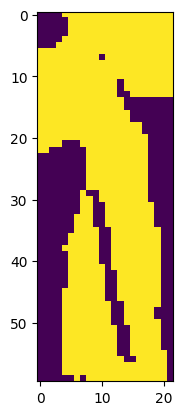

In [21]:
# Make the img into a 2d array

img_2d = top_half_image.reshape(-1,3)

# Do k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(img_2d)

# Get labels
labeles = kmeans.labels_

# Reshape into original shape
clustered_image = labeles.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display it
plt.imshow(clustered_image)
plt.show()

In [8]:
corner_cluster = [clustered_image[0,0], clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)

print(non_player_cluster)


0


In [9]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [13]:
kmeans.cluster_centers_[player_cluster]

array([52.26536124, 38.71640783, 74.66239028])